# Commodities seasons research

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline 
import glob
import datetime
from collections import defaultdict

### Data prepare

In [2]:
monthly_path = 'Q:/MSK1_QR/HistoricalData/Futures/Month/'
files = glob.glob(monthly_path + '*.csv')
monthly_data = defaultdict()

for filename in files:
    sym = filename[41:-6]
    monthly_data[sym] = pd.read_csv(filename, parse_dates=['Date'], index_col='Date')
    monthly_data[sym] = monthly_data[sym][monthly_data[sym].index > datetime.datetime.strptime('2009-01-01', '%Y-%m-%d')]

In [3]:
energy = ['CL', 'NG', 'RB']
agriculture = ['W', 'C', 'S', 'SM', 'SB', 'KC', 'CT']
metals = ['GC', 'SI']

### Monthly volumes

##### Energy

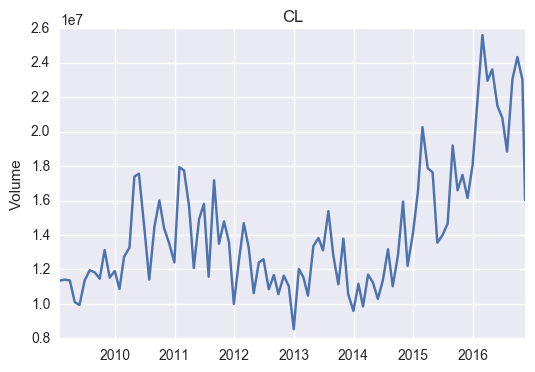

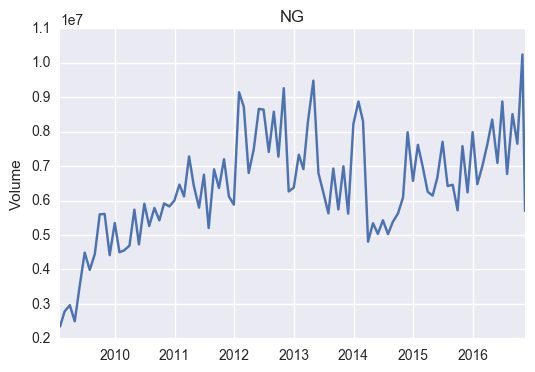

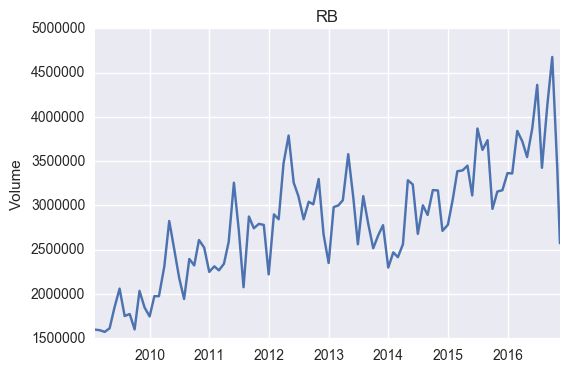

In [4]:
for sym in energy:
    plt.figure()
    plt.plot(monthly_data[sym]['Volume'])
    plt.ylabel('Volume')
    plt.title(sym)

##### Agriculture

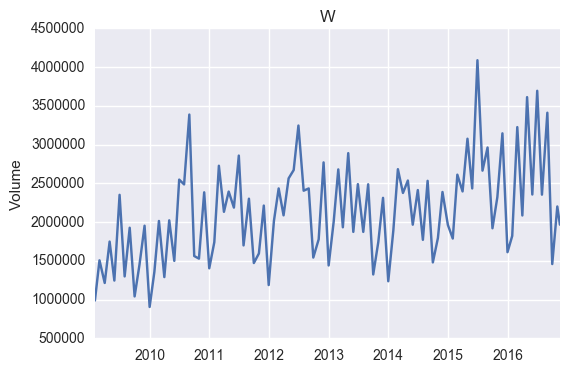

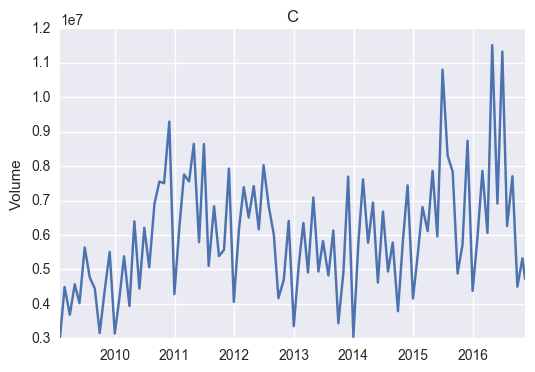

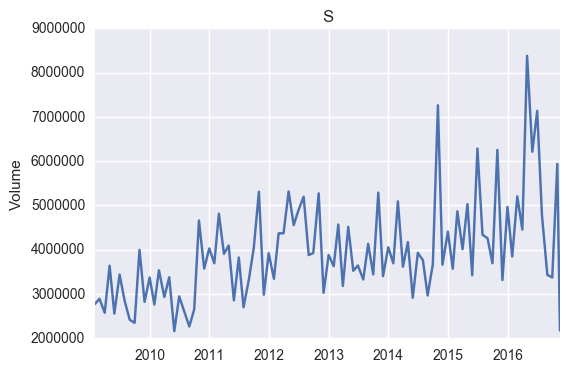

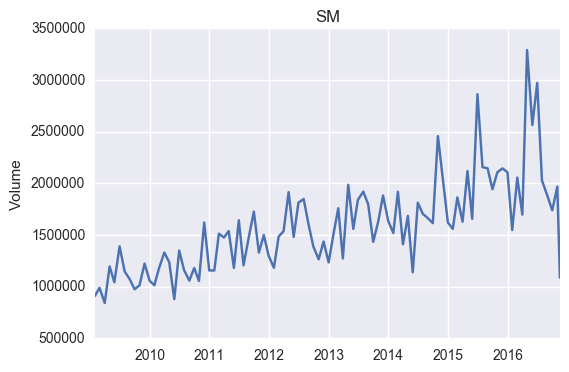

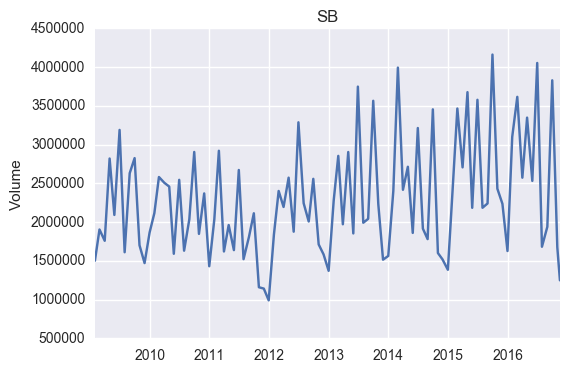

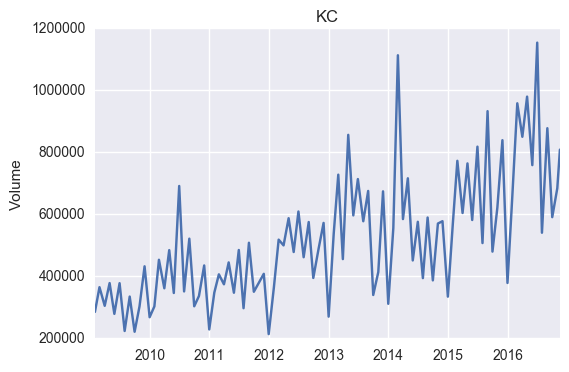

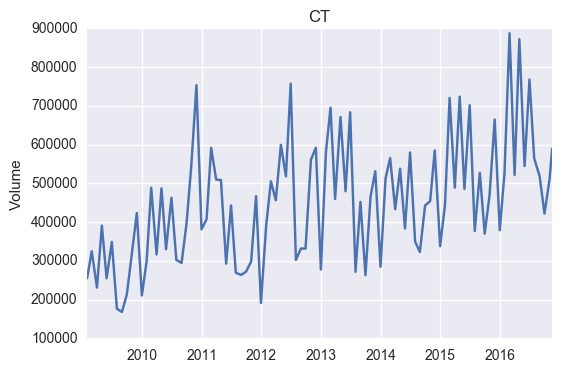

In [5]:
for sym in agriculture:
    plt.figure()
    plt.plot(monthly_data[sym]['Volume'])
    plt.ylabel('Volume')
    plt.title(sym)

##### Metals

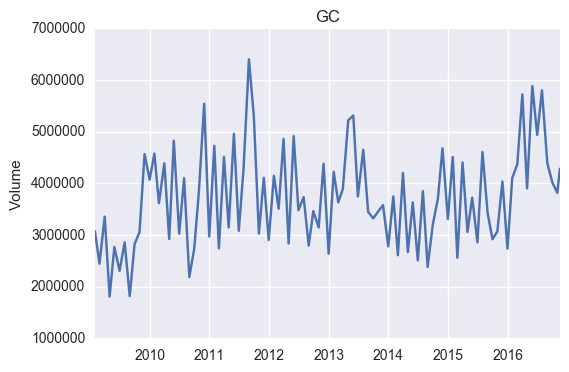

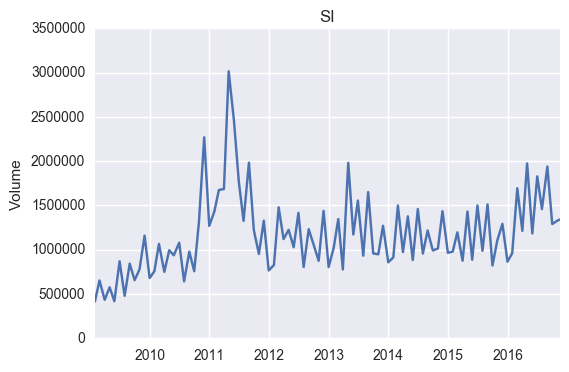

In [6]:
for sym in metals:
    plt.figure()
    plt.plot(monthly_data[sym]['Volume'])
    plt.ylabel('Volume')
    plt.title(sym)

### Monthly returns 2-moment

In [7]:
for sym in monthly_data.keys():
    monthly_data[sym]['month'] = monthly_data[sym].apply(lambda z: z.name.month, axis = 1)

In [8]:
def apply_monthly_stat(fun, sym):
    res = np.zeros(12)
    for i in range(1, 13):
        res[i - 1] = fun(monthly_data[sym][monthly_data[sym].month == i])
    return res / res.max()

In [9]:
def returns_2_mom(df):
    y = df.Close - df.Open
    stat = np.array(y) ** 2
    stat = stat 
    return np.median(stat)

def volume(df):
    stat = df.OpenInterest 
    return np.median(stat)

##### Energy

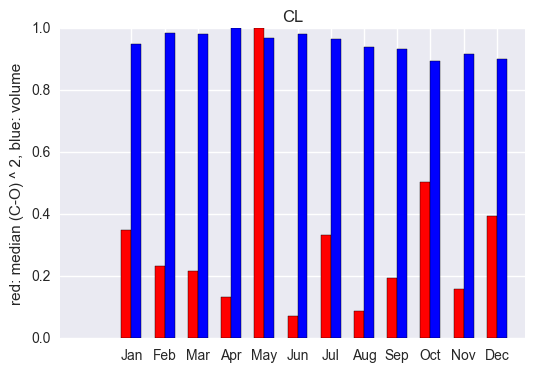

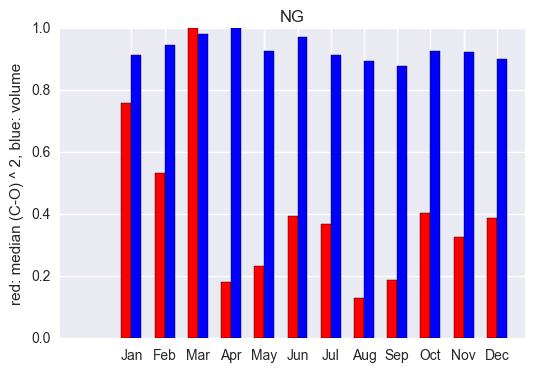

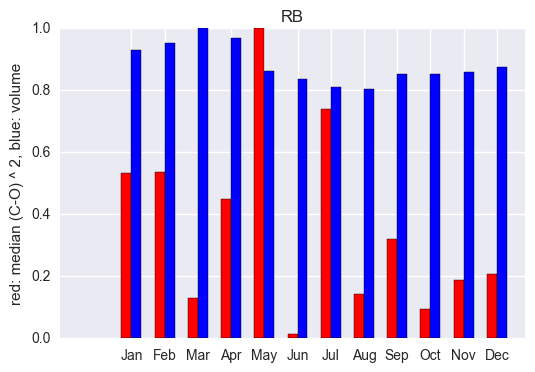

In [10]:
months_labs = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
width = 0.3
for sym in energy:
    fig, ax = plt.subplots()
    ar1 = apply_monthly_stat(returns_2_mom, sym)
    ar2 = apply_monthly_stat(volume, sym)
    ax.bar(np.arange(12) - width / 2, ar1, width, color = 'r')
    ax.bar(np.arange(12) + width / 2, ar2, width, color = 'b')
    ax.set_xticks(np.arange(12) + width / 2)
    ax.set_xticklabels(months_labs)
    ax.set_ylabel('red: median (C-O) ^ 2, blue: volume')
    ax.set_title(sym)

##### Agriculture

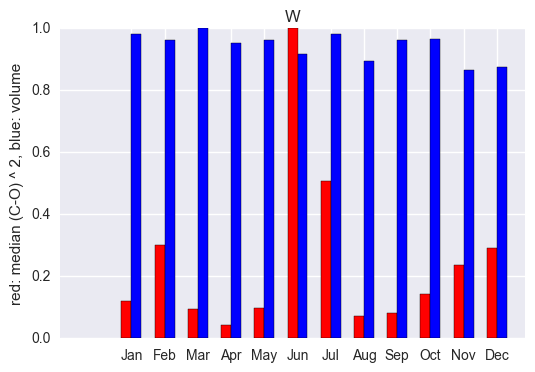

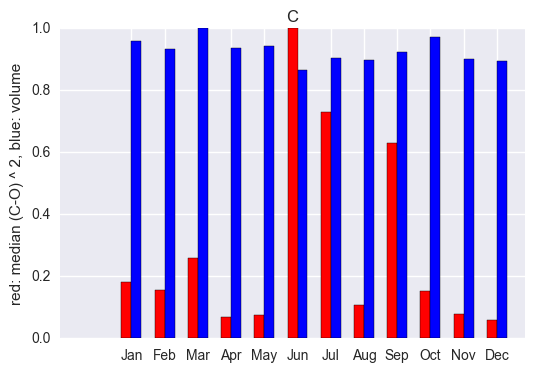

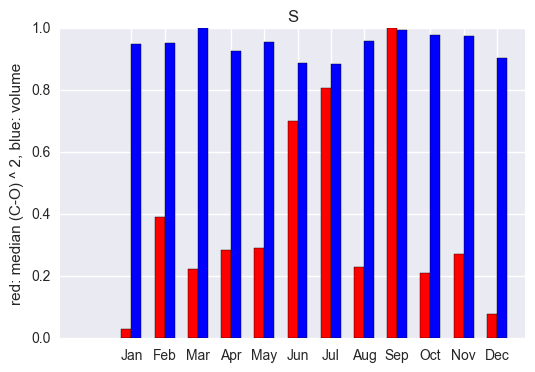

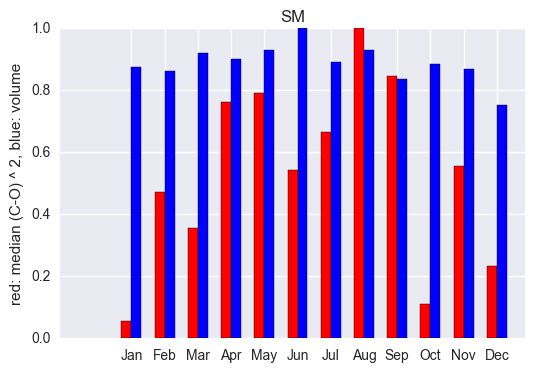

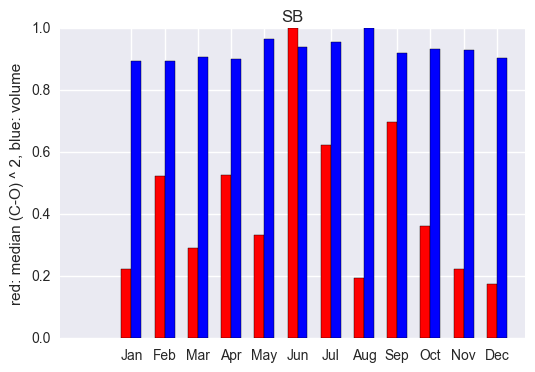

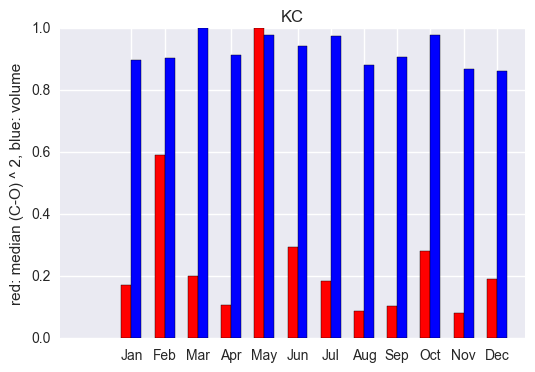

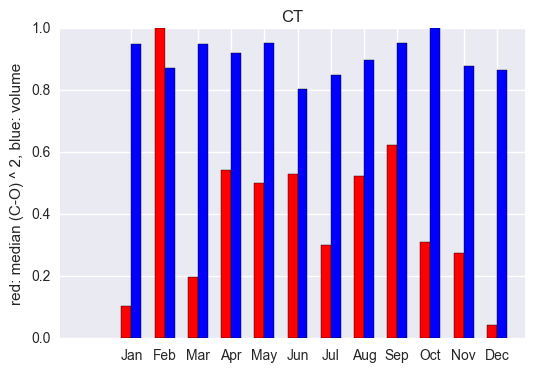

In [11]:
for sym in agriculture:
    fig, ax = plt.subplots()
    ar1 = apply_monthly_stat(returns_2_mom, sym)
    ar2 = apply_monthly_stat(volume, sym)
    ax.bar(np.arange(12) - width / 2, ar1, width, color = 'r')
    ax.bar(np.arange(12) + width / 2, ar2, width, color = 'b')
    ax.set_xticks(np.arange(12) + width / 2)
    ax.set_xticklabels(months_labs)
    ax.set_ylabel('red: median (C-O) ^ 2, blue: volume')
    ax.set_title(sym)

##### Metals

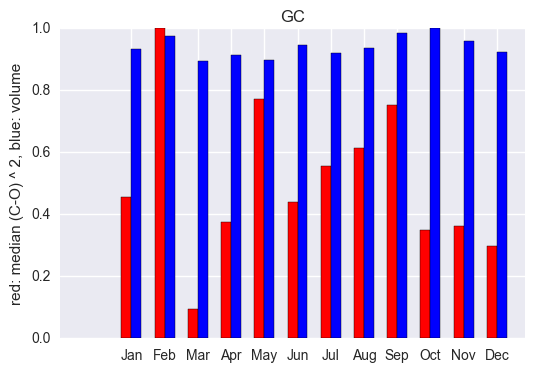

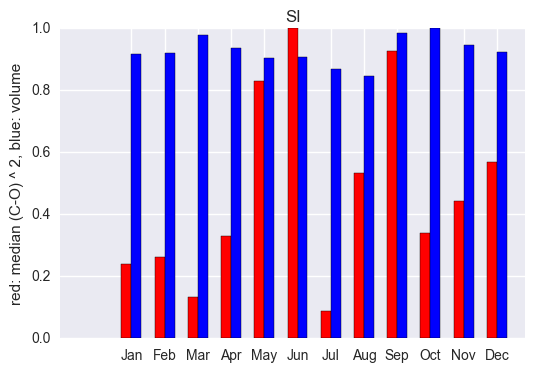

In [12]:
for sym in metals:
    fig, ax = plt.subplots()
    ar1 = apply_monthly_stat(returns_2_mom, sym)
    ar2 = apply_monthly_stat(volume, sym)
    ax.bar(np.arange(12) - width / 2, ar1, width, color = 'r')
    ax.bar(np.arange(12) + width / 2, ar2, width, color = 'b')
    ax.set_xticks(np.arange(12) + width / 2)
    ax.set_xticklabels(months_labs)
    ax.set_ylabel('red: median (C-O) ^ 2, blue: volume')
    ax.set_title(sym)